In [21]:
# Python 2.7
import cv2
import imageio
import scipy as sp
from scipy import misc
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mat
import numpy.fft
from __future__ import division # force floating division in python 2.7

# normalize image and turn into unsigned integer 8 bits
def normalize(image):
    return ((image - image.min())/(image.max() - image.min())*255).astype(np.uint8)

# Load image
image = cv2.imread('face.png', cv2.IMREAD_GRAYSCALE)

#a) Filter h1
h1 = np.array([[0,0,-1,0,0], [0,-1,-2,-1,0], [-1,-2,16,-2,-1], [0,-1,-2,-1,0], [0,0,-1,0,0]],np.float32)
image_h1 = normalize(ndimage.convolve(image, h1))

# b) Filter h2
h2 = (1.0/256)*np.array([[1,4,-6,4,1], [4,16,24,16,4], [6,24,36,24,6], [4,16,24,16,4],[1,4,-6,4,1]])
image_h2 = normalize(ndimage.convolve(image, h2))

# c)

# c.1) Filter h3
h3 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
image_h3 = normalize(ndimage.convolve(image, h3))

# c.2) Filter h4
h4 = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
image_h4 = normalize(ndimage.convolve(image, h4))

# c.3) Filter h5
# square elements of image_h3 and image_h4
image_h3_sq = np.power(image_h3,2.0)
image_h4_sq = np.power(image_h4,2.0)

image_h5 = normalize(np.sqrt(image_h3_sq + image_h4_sq))

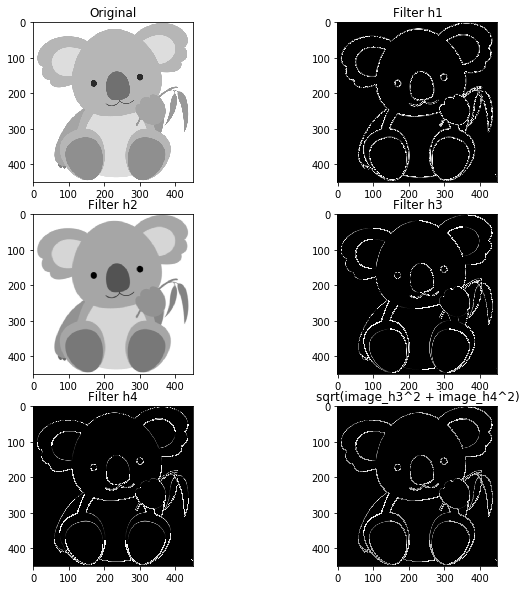

In [13]:
# Show image
fig=plt.figure(figsize=(10, 10))

fig1 = fig.add_subplot(3, 2, 1)
plt.imshow(image, cmap=cm.gray, vmin=0, vmax=255)
fig1.set_title('Original')

fig2 = fig.add_subplot(3, 2, 2)
plt.imshow(image_h1, cmap=cm.gray, vmin=0, vmax=255)
fig2.set_title('Filter h1')

fig3 = fig.add_subplot(3, 2, 3)
plt.imshow(image_h2, cmap=cm.gray, vmin=0, vmax=255)
fig3.set_title('Filter h2')

fig4 = fig.add_subplot(3, 2, 4)
plt.imshow(image_h3, cmap=cm.gray, vmin=0, vmax=255)
fig4.set_title('Filter h3')

fig5 = fig.add_subplot(3, 2, 5)
plt.imshow(image_h4, cmap=cm.gray, vmin=0, vmax=255)
fig5.set_title('Filter h4')

fig6 = fig.add_subplot(3, 2, 6)
plt.imshow(image_h5, cmap=cm.gray, vmin=0, vmax=255)
fig6.set_title('sqrt(image_h3^2 + image_h4^2)')

plt.show()

# saving...
fig.savefig('results.png')

In [22]:
imageio.imwrite('image_h1.png', image_h1)
imageio.imwrite('image_h2.png', image_h2)
imageio.imwrite('image_h3.png', image_h3)
imageio.imwrite('image_h4.png', image_h4)
imageio.imwrite('image_h5.png', image_h5)

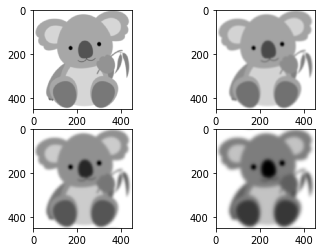

<Figure size 720x720 with 0 Axes>

In [19]:
# Apply guassian filter to blurr the image
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig=plt.figure(figsize=(10, 10))

input_ = numpy.fft.fft2(image)

result1 = ndimage.fourier_gaussian(input_, sigma=2)
result1 = numpy.fft.ifft2(result1)
ax1.imshow(result1.real)

result2 = ndimage.fourier_gaussian(input_, sigma=4)
result2 = numpy.fft.ifft2(result2)
ax2.imshow(result2.real)

result3 = ndimage.fourier_gaussian(input_, sigma=6)
result3 = numpy.fft.ifft2(result3)
ax3.imshow(result3.real)

result4 = ndimage.fourier_gaussian(input_, sigma=8)
result4 = numpy.fft.ifft2(result4)
ax4.imshow(result4.real)

plt.show()

fig.savefig('guassian_results.png')

In [25]:
# Python warns when I use imageio.imwrite to these images, so I had to use the deprecated function. 
sp.misc.imsave('guass1.png', result1.real)
sp.misc.imsave('guass2.png', result2.real)
sp.misc.imsave('guass3.png', result3.real)
sp.misc.imsave('guass4.png', result4.real)

/home/tiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  
/home/tiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/tiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  after removing the cwd from sys.path.
/home/tiago/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` 